<a href="https://colab.research.google.com/github/prabalpandey2411/220940325048_Prabal_Pandey/blob/main/Sales_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install pandas numpy matplotlib seaborn
#pip install jupyterlab # Optional: If you prefer Jupyter Notebook


In [17]:
!wget "https://www.kaggle.com/datasets/kyanyoga/sample-sales-data?resource=download"


--2025-01-18 10:57:02--  https://www.kaggle.com/datasets/kyanyoga/sample-sales-data?resource=download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘sample-sales-data?resource=download’

sample-sales-data?r     [ <=>                ]   9.42K  --.-KB/s    in 0.002s  

2025-01-18 10:57:02 (5.76 MB/s) - ‘sample-sales-data?resource=download’ saved [9641]



In [19]:
!ls

 sales_data_sample.csv	 sample_data  'sample-sales-data?resource=download'


**Step 2: Load and Inspect Data**


In [24]:
import pandas as pd
df = pd.read_csv('sales_data_sample.csv', encoding='latin1' )
print(df.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [25]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


**Step 3: Data Cleaning**
Actions:

Handle missing values.
Remove duplicates.
Standardize column names.


In [26]:
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
df.fillna({'Discount': 0}, inplace=True)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Verify cleaned data
print(df.isnull().sum())


ordernumber            0
quantityordered        0
priceeach              0
orderlinenumber        0
sales                  0
orderdate              0
status                 0
qtr_id                 0
month_id               0
year_id                0
productline            0
msrp                   0
productcode            0
customername           0
phone                  0
addressline1           0
addressline2        2521
city                   0
state               1486
postalcode            76
country                0
territory           1074
contactlastname        0
contactfirstname       0
dealsize               0
dtype: int64


**Step 4: Data Exploration**
Actions:

Summarize data.
Identify trends and top performers.

In [35]:
# Total sales and revenue
total_revenue = df['sales'].sum()
#units_sold= df[df['quantityordered'] *df['priceeach']].sum()

#total_units = df[[df['quantityordered'] *df['priceeach']]].sum()
print(f"Total Revenue: {total_revenue}")
#print(f"Total Units Sold: {total_units}")

# Top-performing products
top_products = df.groupby('productcode')['sales'].sum().sort_values(ascending=False).head(5)
print("Top Products:\n", top_products)


Total Revenue: 10032628.85
Top Products:
 productcode
S18_3232    288245.42
S10_1949    191073.03
S10_4698    170401.07
S12_1108    168585.32
S18_2238    154623.95
Name: sales, dtype: float64


**Step 5: Visualize Trends**
Actions:

Plot sales trends.
Identify seasonal patterns.

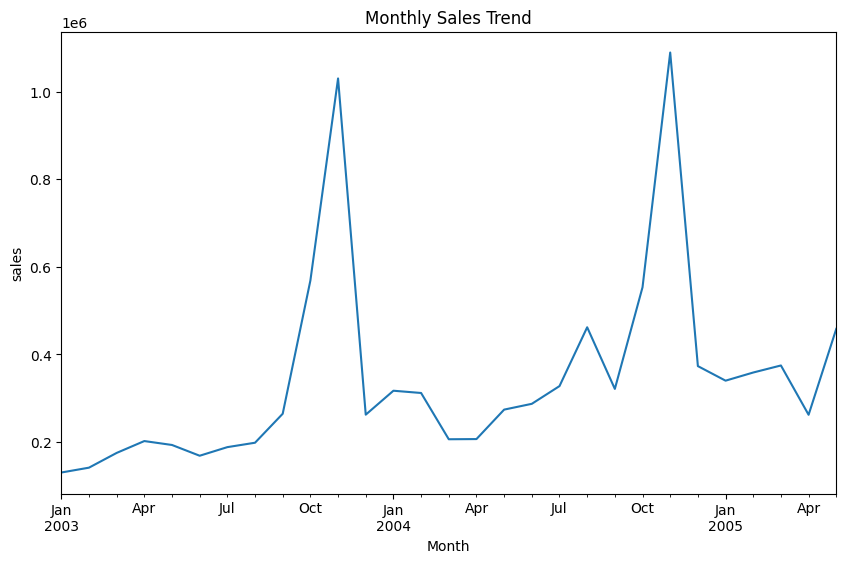

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date to datetime
df['orderdate'] = pd.to_datetime(df['orderdate'])

# Plot sales trends
monthly_sales = df.groupby(df['orderdate'].dt.to_period('M'))['sales'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('sales')
plt.show()


**Step 6: Build KPIs**
Actions:

Calculate metrics like average order value and sales growth rate.

In [45]:
# Average order value
avg_order_value = df['sales'].mean()
print(f"Average Order Value: {avg_order_value}")

# Sales growth rate
df['month'] = df['orderdate'].dt.to_period('M')
monthly_growth = df.groupby('month')['sales'].sum().pct_change() * 100
print("Monthly Growth Rate:\n", monthly_growth)


Average Order Value: 3553.889071909316
Monthly Growth Rate:
 month
2003-01           NaN
2003-02      8.541258
2003-03     23.906291
2003-04     15.532315
2003-05     -4.432548
2003-06    -12.762834
2003-07     11.690279
2003-08      5.367985
2003-09     33.448407
2003-10    115.283455
2003-11     81.216615
2003-12    -74.571093
2004-01     20.888078
2004-02     -1.629267
2004-03    -33.936793
2004-04      0.201421
2004-05     32.641709
2004-06      4.840516
2004-07     14.117025
2004-08     41.069726
2004-09    -30.498369
2004-10     72.384312
2004-11     96.961520
2004-12    -65.768023
2005-01     -8.921406
2005-02      5.490538
2005-03      4.488331
2005-04    -30.093689
2005-05     75.001071
Freq: M, Name: sales, dtype: float64


**Step 7: Advanced Analysis**
Actions:

Perform segmentation (e.g., by region or salesperson).

Revenue by Region:
 country
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: sales, dtype: float64


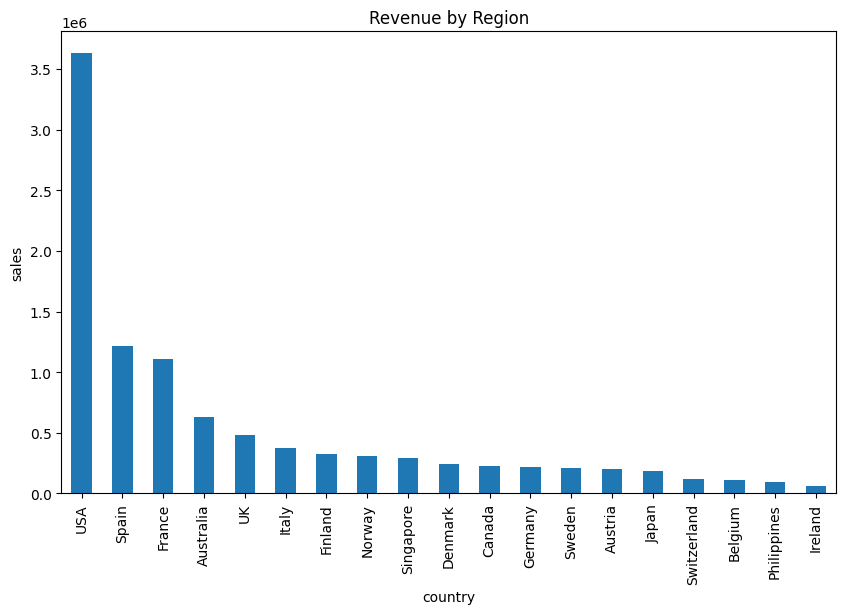

In [46]:
# Revenue by region
region_revenue = df.groupby('country')['sales'].sum().sort_values(ascending=False)
print("Revenue by Region:\n", region_revenue)

# Plot revenue by region
region_revenue.plot(kind='bar', title='Revenue by Region', figsize=(10, 6))
plt.xlabel('country')
plt.ylabel('sales')
plt.show()


In [49]:
import os

# Create the 'content' directory if it doesn't exist
os.makedirs("content", exist_ok=True)

# Save cleaned data
df.to_csv("content/cleaned_sales_data.csv", index=False)

In [50]:
# Save cleaned data
df.to_csv("content/cleaned_sales_data.csv", index=False)


In [52]:
!ls -lh content/cleaned_sales_data.csv

-rw-r--r-- 1 root root 528K Jan 18 11:59 content/cleaned_sales_data.csv


In [53]:
!ls

 content   sales_data_sample.csv   sample_data	'sample-sales-data?resource=download'
